# Divergencia de Kullback-Leibler

<div class="alert-block alert-info alert">
    La <b><em>divergencia de Kullback-Leibler</em></b> (KL), también conocida como <b>divergencia de la información</b>, <b>ganancia de la información</b> o <b>entropía relativa</b>, mide el número esperado de extra bits requeridos en muestras de código de P cuando se usa un código basado en Q, en lugar de un código basado en P.
</div>

[Wikipedia: Divergencia de Kullback-Leibler](https://es.wikipedia.org/wiki/Divergencia\_de\_Kullback-Leibler)

Ilustraremos el concepto mostrando la diferencia entre preparar una códificación óptima para el _inglés_ usando el _español_.  Obsérvese que a la inversa hay problemas porque el inglés no tiene letra **ñ**.

In [11]:
#!pip3 install pandas
#!pip3 install seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## Español

In [2]:
pal = sns.color_palette("husl", 9)
pal.reverse()
pal

[(0.9614880299080136, 0.3909885385134758, 0.8298287106954371),
 (0.731751635642941, 0.5128186367840487, 0.9581005178234921),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.2151139535594307, 0.6700707833028816, 0.7112365203426209),
 (0.20582072623426667, 0.6842209016721069, 0.5675558225732941),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.6430915736746491, 0.6271955086583126, 0.19381135329796756),
 (0.8369430560927636, 0.5495828952802333, 0.1952683223448124),
 (0.9677975592919913, 0.44127456009157356, 0.5358103155058701)]

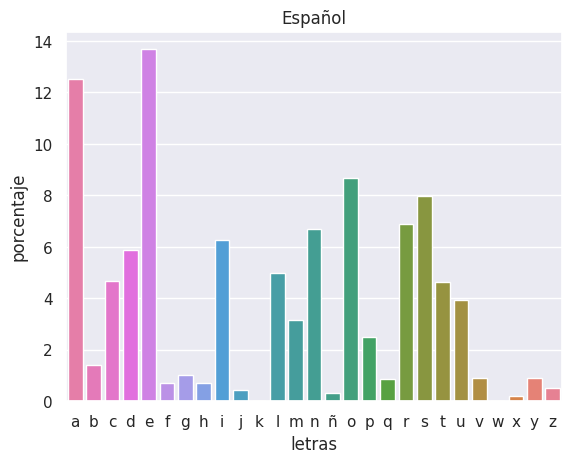

In [3]:
# https://es.wikipedia.org/wiki/Frecuencia_de_aparici%C3%B3n_de_letras
letras_es = ['a', 'b', 'c', 'd', 'e',
          'f', 'g', 'h', 'i', 'j',
          'k', 'l', 'm', 'n', 'ñ',
          'o', 'p', 'q', 'r', 's',
          't', 'u', 'v', 'w', 'x',
          'y', 'z']
# Porcentaje de uso de cada letra al considerar varias fuentes
frecuencia_español = [12.53, 1.42, 4.68, 5.86, 13.68,
                      0.69, 1.01, 0.70, 6.25, 0.44,
                      0.02, 4.97, 3.15, 6.71, 0.31,
                      8.68, 2.51, 0.88, 6.87, 7.98,
                      4.63, 3.93 ,0.90, 0.01, 0.22,
                      0.90, 0.52]
d_español = {'letras': letras_es, 'porcentaje': frecuencia_español}
df_español = pd.DataFrame(data=d_español)

pal = sns.color_palette("husl", len(frecuencia_español))
pal.reverse()
sns.set_theme()
ax = sns.barplot(data=df_español, x="letras", y='porcentaje',
                 hue="letras", palette=pal)
ax.set_title("Español")
pass

## Inglés

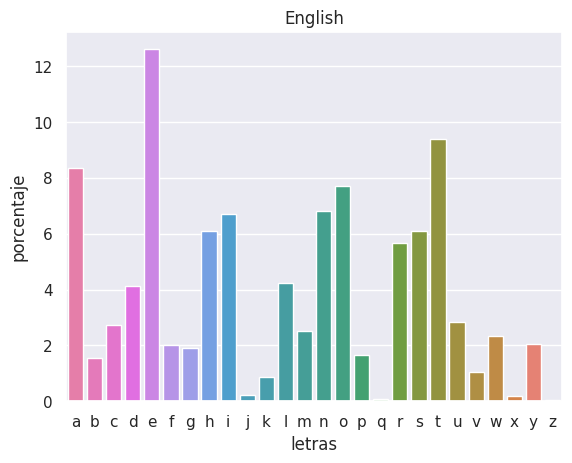

In [4]:
# https://es.sttmedia.com/frecuencias-de-letras-ingles
letras_en = ['a', 'b', 'c', 'd', 'e',
          'f', 'g', 'h', 'i', 'j',
          'k', 'l', 'm', 'n', 'o',
          'p', 'q', 'r', 's', 't',
          'u', 'v', 'w', 'x', 'y',
          'z']
frecuencia_inglés = [8.34, 1.54, 2.73, 4.14, 12.60,
                     2.03, 1.92, 6.11, 6.71, 0.23,
                     0.87, 4.24, 2.53, 6.80, 7.70,
                     1.66, 0.09, 5.68, 6.11, 9.37,
                     2.85, 1.06, 2.34, 0.20, 2.04,
                     0.06]
d_inglés = {'letras': letras_en, 'porcentaje': frecuencia_inglés}
df_inglés = pd.DataFrame(data=d_inglés)

pal = sns.color_palette("husl", len(frecuencia_inglés))
pal.reverse()
sns.set_theme()
ax = sns.barplot(data=df_inglés, x="letras", y='porcentaje',
                 hue="letras", palette=pal)
ax.set_title("English")
pass

## Comparativo

In [5]:
# El inglés no tiene ñ

pos_ñ = letras_en.index('o')
frecuencia_inglés_es = frecuencia_inglés[0:pos_ñ] + [0] + frecuencia_inglés[pos_ñ:]

In [6]:
df_ambos = pd.DataFrame(data={'letras': letras_es,
                              'español': frecuencia_español,
                              'inglés': frecuencia_inglés_es})

In [7]:
df_melted = pd.melt(df_ambos, id_vars="letras")
df_melted = df_melted.rename(columns={'variable': "idioma",
                                      'value': "porcentaje"})

In [8]:
df_melted

,letras,idioma,porcentaje
0,a,español,12.53
1,b,español,1.42
2,c,español,4.68
3,d,español,5.86
4,e,español,13.68
5,f,español,0.69
6,g,español,1.01
7,h,español,0.70
8,i,español,6.25
9,j,español,0.44


In [9]:
pal = sns.color_palette("husl", 5)
pal.reverse()
pal

[(0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.9677975592919913, 0.44127456009157356, 0.5358103155058701)]

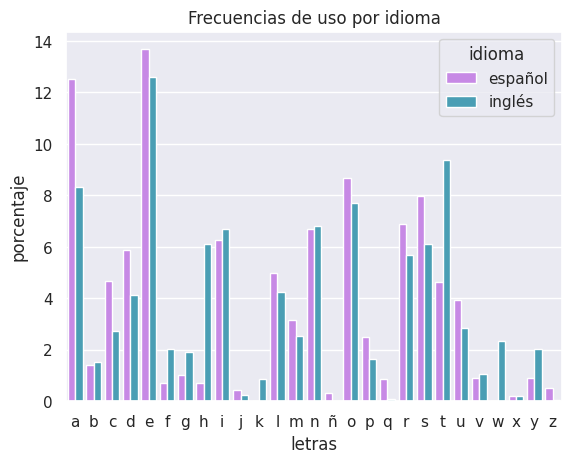

In [10]:
sns.set_theme()
ax = sns.barplot(data=df_melted, x="letras", y='porcentaje',
                 hue='idioma', palette=pal[:2])
ax.set_title("Frecuencias de uso por idioma")
pass

# Fórmula de la divergencia

Sean $P$ y $Q$ las distribuciones de dos variables aleatorias continuas, con $p$ y $q$ sus densidades, entonces la _Divergencia de Kullback-Leibler (KL)_ $\mathcal{D}$ se define como:
  \begin{align*}
   \mathcal{D} (P \Arrowvert Q) &= \int_{-\infty}^{\infty} p(x) \ln\frac{p(x)}{q(x)}dx \\
   &= \int_{-\infty}^{\infty} p(x) [\ln p(x) - \ln q(x)] dx
  \end{align*}
donde $P$ representa la verdadera distribución de los datos y $Q$ es sólo una aproximación.

* Las unidades son bits si el logaritmo es base $2$,
* se llaman _nats_ si la base es $e$.

## Divergencia del inglés con respecto al español

¿Cuánto vale la divergencia de Kullback-Leibler si se codifica un escrito en inglés, usando un código diseñado para el español?

In [11]:
# Emparejando ambas estadísticas
juntos = pd.merge(df_español, df_inglés, how="left", on=["letras"], suffixes=(" español", " inglés"))
juntos.head(3)

,letras,porcentaje español,porcentaje inglés
0,a,12.53,8.34
1,b,1.42,1.54
2,c,4.68,2.73


In [25]:
Q = juntos['porcentaje español'].to_numpy()
P = juntos['porcentaje inglés'].to_numpy(na_value=0.0001) # Si ponemos cero el logaritmo va a infinito

In [26]:
divergencia = np.sum(P * (np.log(P/Q)))

In [29]:
print("DKL(inglés||español) = ", divergencia)

DKL(inglés||español) =  27.54053714946159


¿Y si condificamos al español usando el inglés? (Añadiéndole la ñ)

In [30]:
divergencia_inv = np.sum(Q * (np.log(Q/P)))

In [31]:
print("DKL(español||inglés) = ", divergencia_inv)

DKL(español||inglés) =  17.133818859792797
